This file operates on the stroke_full.csv data which had been created by the file DSI_project_v2.ipynb using the dataset present in healthcare-dataset-stroke-data.csv

For further details on how stroke_full.csv was created, and the data it contains, please read the documentation in DSI_project_v2.ipynb

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
#from plotnine import ggplot, aes, geom_boxplot, labs, guides
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px  # Import Plotly Express for colors

In [2]:
df = pd.read_csv(r"c:\Users\laure\Downloads\stroke_full.csv")
print (df.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


Note that gender and smoking_status are showing up as object variables even though they were category variables when this dataframe was written to stroke_full.csv by DSI_project_v2.ipynb. This is a known issue in 

pandas. 

In [3]:
print (df.shape)

(3413, 18)


In [4]:
# Convert categorical columns back to "category"
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print(df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int64
work_type_encoded            int64
Residence_type_encoded       int64
smoking_status_encoded       int64
Age_temp                     int64
avg_glucose_level_temp       int64
dtype: object


In [5]:
df['heart_risk'] = (df['hypertension'] | df['heart_disease']).astype(int)

# Verify the result
print(df[['hypertension', 'heart_disease', 'heart_risk']].head(10))

   hypertension  heart_disease  heart_risk
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           1
7             0              0           0
8             0              0           0
9             0              0           0


In [6]:
print (df.dtypes)


gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int64
work_type_encoded            int64
Residence_type_encoded       int64
smoking_status_encoded       int64
Age_temp                     int64
avg_glucose_level_temp       int64
heart_risk                   int32
dtype: object


In [7]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2026
Male: 1387

Count of each level in 'ever_married':
Yes: 3051
No: 362

Count of each level in 'work_type':
Private: 2090
Self-employed: 753
Govt_job: 570

Count of each level in 'Residence_type':
Urban: 1729
Rural: 1684

Count of each level in 'smoking_status':
never smoked: 1371
formerly smoked: 773
Unknown: 661
smokes: 608


In [8]:
#This function does a Chi square test of independence on two nominal variables. It returns the Chi Square test statistic, p-value, degrees of freedom, and expected frequencies
def chi_square(dataframe, var1, var2):
    try:
        # Create the contingency table
        contingency_table = pd.crosstab(dataframe[var1], dataframe[var2])

        # Do the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        return chi2, p, dof, expected

    except:
        print(f"Error performing chi-square test")



In [9]:
#stroke and gender
result = chi_square(df, 'stroke', 'gender')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 0.9177594052664405
P-value: 0.33806396780881875
Degrees of freedom: 1
Expected frequencies:
[[1879.3776736 1286.6223264]
 [ 146.6223264  100.3776736]]


p value of the Chi square test of independence on gender and stroke is 0.338. Hence we fail to reject the null hypothesis of no association between gender and stroke.

In [10]:
#Stroke and heart risk
result = chi_square(df, 'stroke', 'heart_risk')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)


Chi-square statistic: 67.27529316498607
P-value: 2.361219893995417e-16
Degrees of freedom: 1
Expected frequencies:
[[2528.71842953  637.28157047]
 [ 197.28157047   49.71842953]]


p-value for the Chi square test of independence on heart risk and stroke is 0.000. Hence we reject H0 and conclude that there **is** a significant association between heart risk and stroke

In [11]:
#Stroke and ever married
result = chi_square(df, 'stroke', 'ever_married')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 0.004196368695238362
P-value: 0.9483496555138795
Degrees of freedom: 1
Expected frequencies:
[[ 335.80193378 2830.19806622]
 [  26.19806622  220.80193378]]


p value of the Chi square test of independence on stroke and ever married is 0.9483. Hence we fail to reject the null hypothesis of no association between stroke and ever married at the 5% significance level.

In [12]:
#Stroke and work type
result = chi_square(df, 'stroke', 'work_type')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 3.998458019195217
P-value: 0.13543966567485147
Degrees of freedom: 2
Expected frequencies:
[[ 528.74890126 1938.74597129  698.50512745]
 [  41.25109874  151.25402871   54.49487255]]


p value of the Chi square test of independence on stroke and work_type is 0.1354. Hence we fail to reject the null hypothesis of no association between stroke and ever married at the 5% significance level.

In [13]:
#Stroke and Residence type
result = chi_square(df, 'stroke', 'Residence_type')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 1.2237362549577369
P-value: 0.2686286548452952
Degrees of freedom: 1
Expected frequencies:
[[1562.12833285 1603.87166715]
 [ 121.87166715  125.12833285]]


p value of the Chi square test of independence on stroke and Residence_type is 0.2686. Hence we fail to reject the null hypothesis of no association between stroke and Residence type at the 5% significance level.

In [14]:
#Stroke and Smoking type
result = chi_square(df, 'stroke', 'smoking_status')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 5.011184251740086
P-value: 0.17098000795349666
Degrees of freedom: 3
Expected frequencies:
[[ 613.16319953  717.05772048 1271.78025198  563.99882801]
 [  47.83680047   55.94227952   99.21974802   44.00117199]]


p value of the Chi square test of independence on stroke and smoking_status is 0.1710. Hence we fail to reject the null hypothesis of no association between stroke and smoking status type at the 5% significance level.

However, the smoking status variable is a very interesting variable in that its levels are never smoked, formerly smoked, Unknown and smokes. Let's try doing some other other Chi square tests of independence and see 

what happens. In the first test we will combine formerly smoked and smokes into one category and have never smoked and Unknown as the other two categories. 

In [15]:
#  Combines two or three levels of 'smoking_status' into a new level.
def combine_smoker_categories(df, new_level, level1, level2, level3 = None):
    # Create a mapping dictionary
    category_mapping = {level1: new_level, level2: new_level}
    if level3 is not None:
        category_mapping[level3] = new_level
    
    # Apply the mapping to the column
    df['smoking_status'] = df['smoking_status'].map(category_mapping).fillna(df['smoking_status'])
    
    # Convert back to categorical and remove unused categories
    df['smoking_status'] = df['smoking_status'].astype('category').cat.remove_unused_categories()
    
    return df


In [16]:
df_smoke_test = combine_smoker_categories(df.copy(),'Ever_Smoked', 'smokes', 'formerly smoked')
result = chi_square(df_smoke_test, 'stroke', 'smoking_status')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 2.6728070843107927
P-value: 0.26278908094368353
Degrees of freedom: 2
Expected frequencies:
[[1281.05654849  613.16319953 1271.78025198]
 [  99.94345151   47.83680047   99.21974802]]


In [17]:
df_smoke_test_2 = combine_smoker_categories(df.copy(), 'Ever_Smoked', 'smokes', 'formerly smoked', 'Unknown' )
result = chi_square(df_smoke_test_2, 'stroke', 'smoking_status')
if result:
    chi2, p, dof, expected = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 1.3807519931334042
P-value: 0.2399730970890941
Degrees of freedom: 1
Expected frequencies:
[[1894.21974802 1271.78025198]
 [ 147.78025198   99.21974802]]


p-values for the Chi square test on stroke and smoking_status continues to remain non-significant even when we combined the levels of the smoking_status variable in all possible (even non-intuitive) ways.

Our inference so far is: 

**No association exists between Stroke and the following variables**: Gender, ever_married, work_type, residence_type

**An association exists between Stroke and heart risk**, where heart risk is a composite variable obtained by combining the binary variables hypertension and heart_disease

A question exists over whether there is any association between Stroke and Smoking status. The Chi Square test of independence is saying there is no association based on the current levels of smoking status which are 

never smoked, formerly smoked, Unknown, and smokes. Combining the observations corresponding to formerly smoked and smokes into a a single level called Ever_Smoked and doing a Chi Square test of independence on 

stroke and smoking status yielded an insignificant p value at the 5% significance level. Combining the observations corresponding to formerly smoked, smokes and Unknown into a a single level called Ever_Smoked and 

doing a Chi Square test of independence on stroke and smoking status also yielded an insignificant p value at the 5% significance level. This second combination of formerly smoked, smokes and Unknown was completely 

arbitrary and done the assumption that many former smokers would refuse to disclose that they had been smokers previously. The point is that no matter how we frame the Chi Square test of independence, the dataset we 

have continues to tell us that there is no association between Stroke and smoking status at the 5% significance level.

Our revised inference therefore is:

**No association exists between Stroke and the following variables**: Gender, ever_married, work_type, residence_type, and smoking_status

**An association exists between Stroke and heart risk**, where heart risk is a composite variable obtained by combining the binary variables hypertension and heart_disease


**Numerical Features**

There are three candidate features in this dataset which are numerical variables. These are age, avg_glucose_level, and bmi. Using the VarianceThreshold method we will identify if any of these variables has a 

variance of 0.9 or more in its variable values in which case it would be useful for any prediction. We will standardize these numerical variables before we apply the VarianceThreshold method on them.


In [18]:
df_numerical_predictors = df[['age', 'avg_glucose_level', 'bmi']]
#numerical_predictors.head(6)

In [19]:
def scale_numerical_predictors(df, numerical_predictors):
    scaler = StandardScaler()

    # Create a copy of the dataframe to avoid modifying the original.
    df_scaled = df.copy()

    # Scale the numerical columns.
    df_scaled[numerical_predictors] = scaler.fit_transform(df_scaled[numerical_predictors])

    return df_scaled

In [20]:
numerical_predictors = ['age', 'avg_glucose_level', 'bmi']
df_numerical_predictors_scaled = scale_numerical_predictors(df_numerical_predictors, numerical_predictors)
print (df_numerical_predictors_scaled)

           age  avg_glucose_level       bmi
0     0.763532           2.312038  0.887420
1     0.343728           1.787070 -0.305926
2     1.673108          -0.121883  0.260149
3    -0.495881           1.172891  0.550835
4     1.603141           1.230185 -1.040292
...        ...                ...       ...
3408  1.673108          -0.561404 -0.367123
3409  1.743076           0.260344  1.407596
3410 -1.475424          -0.576471 -0.030538
3411 -0.355946           1.074955 -0.795503
3412 -0.845718          -0.531072 -0.703707

[3413 rows x 3 columns]


In [21]:
var_thr = VarianceThreshold(threshold = 0.90)
var_thr.fit(df_numerical_predictors_scaled)
mask = var_thr.get_support()
print (mask)


[ True  True  True]


Our inference is:

All three numerical predictors (age, avg_glucose_level, and bmi) have a variance greater or equal to 0.90 implying sufficient inherent variability for prediction of the binary outcome variable stroke (presence or 

absence of stroke). Whether these three numerical predictors are significant predictors of the outcome variable will have to be determined by a statistical test or model.

At this point, we are left with four predictors for stroke. The three numerical variables age, avg_glucose_level and bmi, and also the nominal binary variable heart_risk (which is a composite variable created by 

combining the hypertension and heart_disease variables.)

At this point let us create a smaller dataframe comprising of only the outcome variable stroke and the three numerical predictors from the original df dataframe in this file.

In [22]:
df_small = df[['stroke', 'age', 'avg_glucose_level', 'bmi' ]]
df_small.shape

(3413, 4)

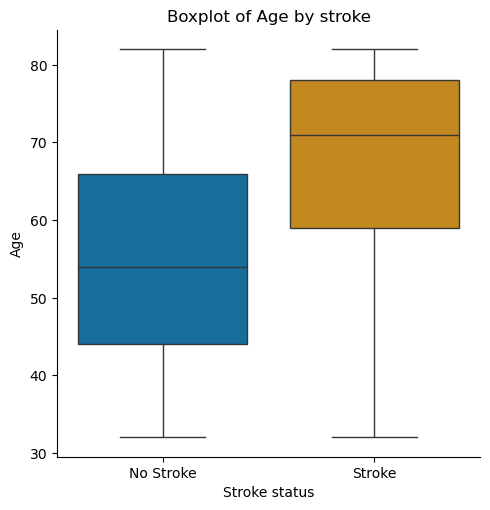

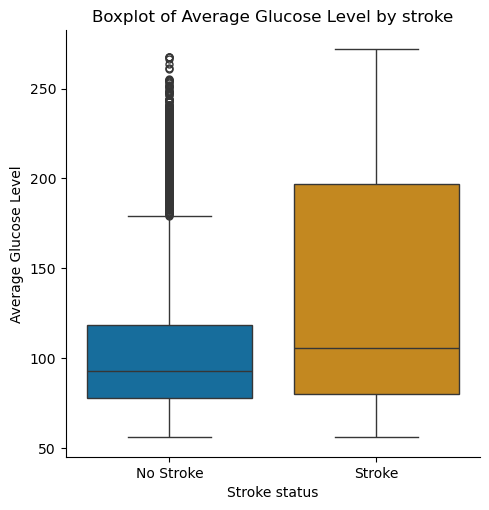

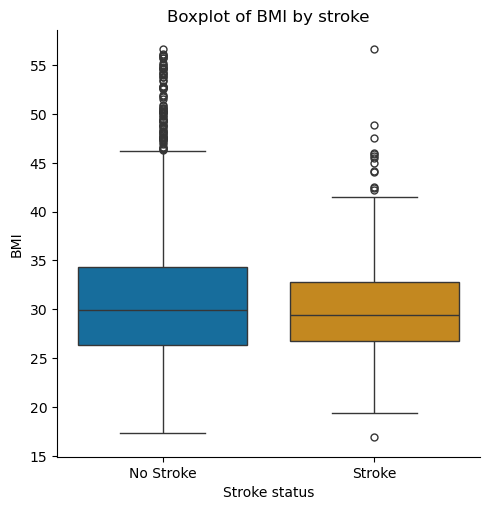

In [23]:
predictors = ['age', 'avg_glucose_level', 'bmi']
target = 'stroke'

predictor_labels = {
    'age': 'Age',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}
#df_small['stroke_label'] = df_small['stroke'].map(stroke_labels)
x_axis_label = 'Stroke status'
palette = sns.color_palette("colorblind", 2)


for predictor in predictors:
    df_plot = df_small.copy() #create a copy of df_small
    stroke_labels = {0: 'No Stroke', 1: 'Stroke'} #stroke labels

    df_plot['stroke_label'] = df_plot['stroke'].map(stroke_labels)
    g = sns.catplot(x=target, y=predictor, data=df_plot, kind="box",
                hue=target, legend=False, palette = palette)
    # Set customized x-axis labels
    g.set_xticklabels(['No Stroke', 'Stroke'])  # 0 = No Stroke, 1 = Stroke
    plt.title(f'Boxplot of {predictor_labels[predictor]} by {target}')
    g.set_axis_labels(x_axis_label, predictor_labels[predictor])



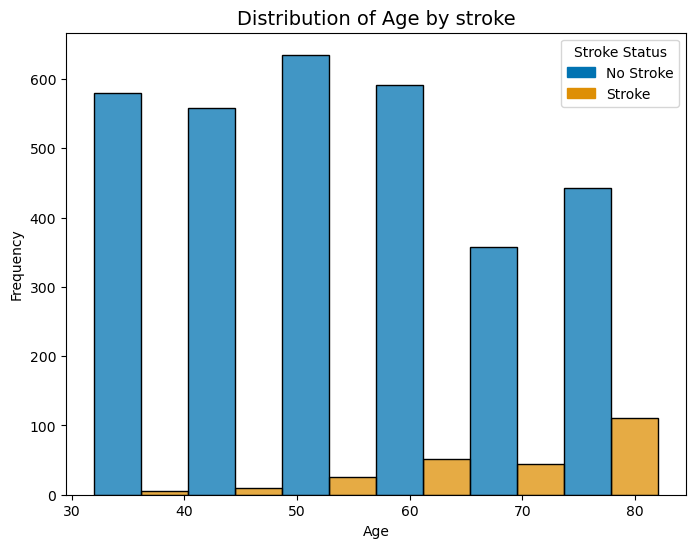

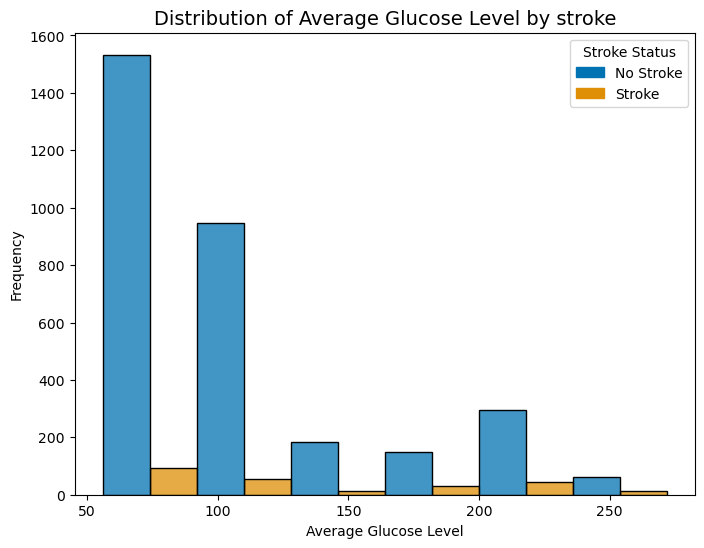

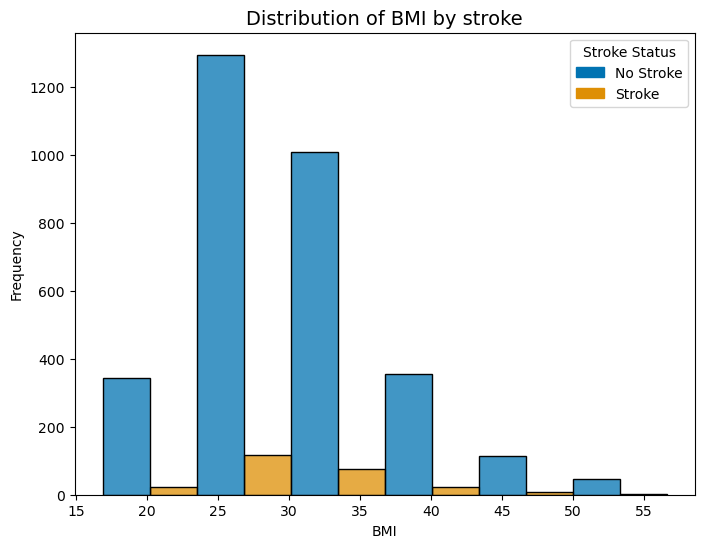

In [24]:
#creating histograms
num_bins = 6
for predictor in predictors:
    df_plot = df_small.copy() #create a copy of df_small
    stroke_labels = {0: 'No Stroke', 1: 'Stroke'} #stroke labels
    df_plot['stroke_label'] = df_plot['stroke'].map(stroke_labels)
    plt.figure(figsize=(8, 6))  # Set the figure size

    sns.histplot(data=df_plot, x=predictor, hue=target, kde= False, palette= palette, multiple="dodge", bins = num_bins)
    
    # Set title and axis labels using the custom predictor labels
    plt.title(f'Distribution of {predictor_labels[predictor]} by {target}', fontsize=14)
    plt.xlabel(predictor_labels[predictor])  # Custom x-axis label
    plt.ylabel('Frequency')  # Y-axis label for histograms
    
    # Customize legend
    handles = [plt.Rectangle((0, 0), 1, 1, color= palette[0], label='No Stroke'),
               plt.Rectangle((0, 0), 1, 1, color= palette[1], label='Stroke')]
    
    # Add the custom legend
    plt.legend(handles=handles, title='Stroke Status')
    
    
    # Show the plot
    plt.show()

In [25]:
stroke_counts = df_small['stroke'].value_counts()
print (stroke_counts)

stroke
0    3166
1     247
Name: count, dtype: int64


In [26]:
#Shapiro Wilk test
#df_small = df[['stroke', 'age', 'avg_glucose_level', 'bmi' ]]
#predictors = ['age', 'avg_glucose_level', 'bmi']
#target = 'stroke'
stroke_values = df[target].unique()
for predictor in predictors:
    for stroke_val in stroke_values:
        #group_data generated for each combination of stroke status and predictor
        group_data = df_small[df_small[target] == stroke_val][predictor] 
        stat, p = shapiro(group_data)

        print(f"Shapiro-Wilk test for {predictor} (stroke={stroke_val}):")
        print(f"  Statistic: {stat}")
        print(f"  p-value: {p}")
    print()





Shapiro-Wilk test for age (stroke=1):
  Statistic: 0.9088735808791897
  p-value: 4.0817811720307686e-11
Shapiro-Wilk test for age (stroke=0):
  Statistic: 0.9615312204157949
  p-value: 3.2111775312552085e-28

Shapiro-Wilk test for avg_glucose_level (stroke=1):
  Statistic: 0.8721583856342205
  p-value: 1.6113642741321607e-13
Shapiro-Wilk test for avg_glucose_level (stroke=0):
  Statistic: 0.8070506222152376
  p-value: 5.797159804238047e-52

Shapiro-Wilk test for bmi (stroke=1):
  Statistic: 0.9461558313234285
  p-value: 6.669402330147665e-08
Shapiro-Wilk test for bmi (stroke=0):
  Statistic: 0.9558592088364247
  p-value: 5.9451006862788204e-30



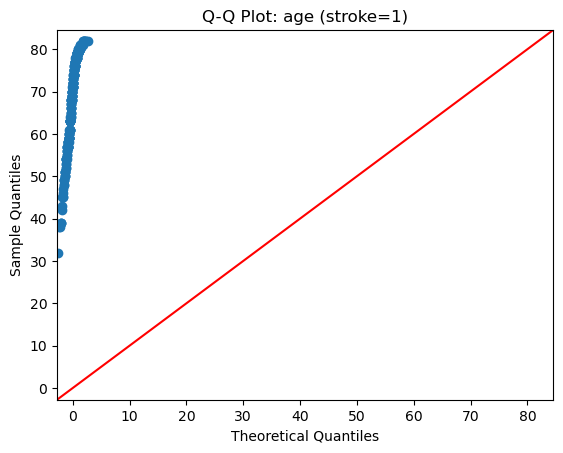

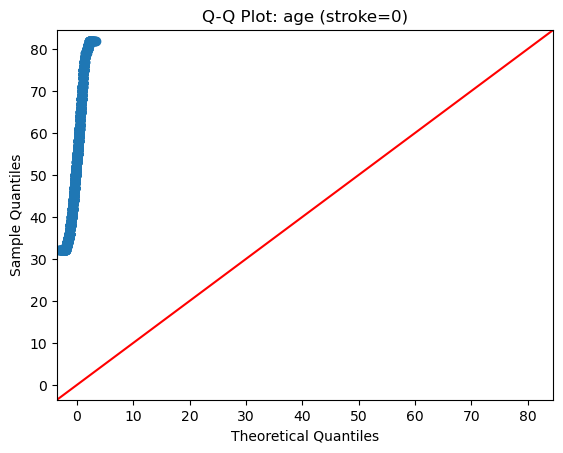

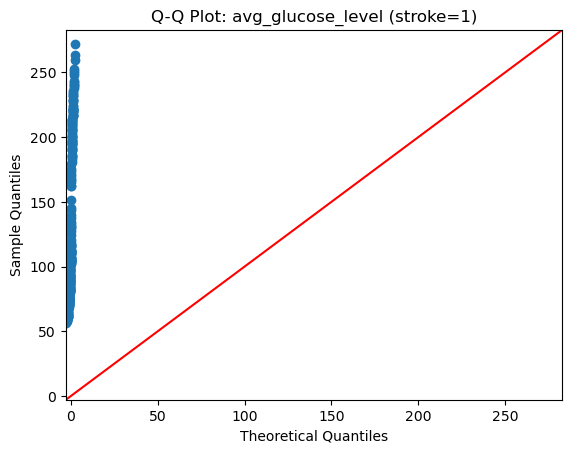

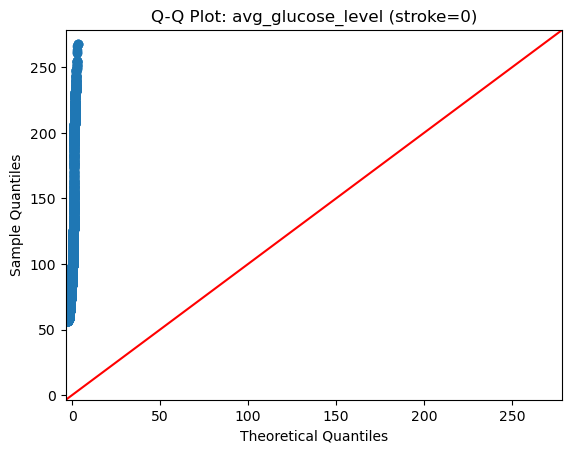

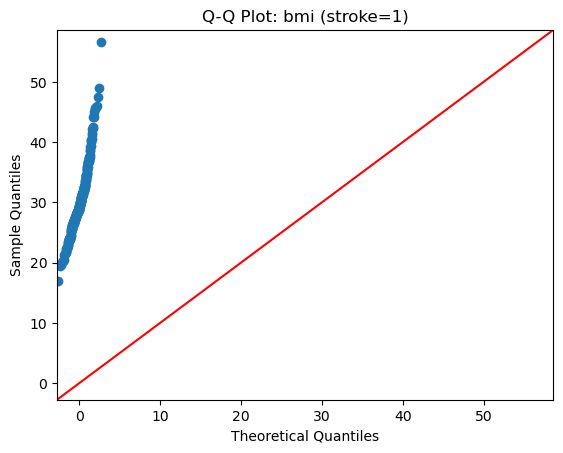

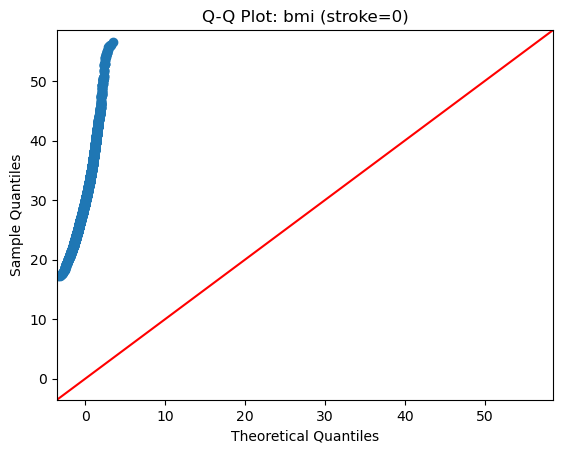

In [27]:
#QQ plots
for predictor in predictors:
    for stroke_val in stroke_values:
        group_data = df[df[target] == stroke_val][predictor]

        # Create Q-Q plot
        sm.qqplot(group_data, line='45')
        plt.title(f'Q-Q Plot: {predictor} (stroke={stroke_val})')
        plt.show()



In [28]:
#Mann Whitney U test
for predictor in predictors:
    # Separate the data into two groups based on the 'stroke' variable
    group_0 = df_small[df_small[target] == 0][predictor]
    group_1 = df_small[df_small[target] == 1][predictor]


    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')

    # Print the results
    print(f"Mann-Whitney U test for {predictor}:")
    print(f"  U statistic: {stat}")
    print(f"  p-value: {p}")

    # Interpret the p-value
    alpha = 0.05  # Significance level
    if p < alpha:
        print(f"  Result: There is a statistically significant difference in {predictor} between stroke groups.")
    else:
        print(f"  Result: There is no statistically significant difference in {predictor} between stroke groups.")

    print()
    print()

Mann-Whitney U test for age:
  U statistic: 189027.5
  p-value: 8.61165772770771e-42
  Result: There is a statistically significant difference in age between stroke groups.


Mann-Whitney U test for avg_glucose_level:
  U statistic: 319832.0
  p-value: 1.829803559501344e-06
  Result: There is a statistically significant difference in avg_glucose_level between stroke groups.


Mann-Whitney U test for bmi:
  U statistic: 404674.5
  p-value: 0.3593018451972725
  Result: There is no statistically significant difference in bmi between stroke groups.




In [ ]:
# Define label mappings for categorical variables
label_mappings = {
    "heart_risk" : {0: "No heart risk", 1: "Has heart risk"},
    "hypertension": {0: "No Hypertension", 1: "Has Hypertension"},
    "heart_disease": {0: "No Heart Disease", 1: "Has Heart Disease"},
    "Age_temp": {0: "40-59 years", 1: "60+ years"},
    "avg_glucose_level_temp": {1: "119 - 190", 2:"190 +"}
}


# Apply the label mappings to the DataFrame
for column, mapping in label_mappings.items():
    if column in df.columns:
        df[column] = df[column].replace(mapping)

# Rename Age_temp to Age
if "Age_temp" in df.columns:
    df.rename(columns={"Age_temp": "Age"}, inplace=True)

# Define the fixed color palettes based on the number of categories
fixed_color_schemes = {
    2: ['#0072B2', '#D55E00'],  # Dark Blue, Orange-Red
    3: ['#0072B2', '#D55E00', '#009E73'],  # Dark Blue, Orange-Red, Dark Green
    4: ['#0072B2', '#D55E00', '#009E73', '#F0E442'],  # Dark Blue, Orange-Red, Dark Green, Bright Yellow
    5: ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#CC79A7']  # Dark Blue, Orange-Red, Dark Green, Bright Yellow, Deep Purple
}

# Define stroke color as black
stroke_color = "#000000"

# Create BMI bins
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, df["bmi"].max()]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese", "Severely Obese"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Create a dictionary to store consistent color mapping for each category in each column
category_color_map = {}

columns_to_analyze = [
    "heart_risk","Age", "heart_disease", "hypertension", "smoking_status", "bmi_category", "avg_glucose_level_temp", "work_type", "Residence_type", "gender", "ever_married"
]

# Create a subplot grid with slightly more vertical spacing
num_columns = len(columns_to_analyze)
fig = make_subplots(
    rows=2, cols=num_columns, 
    subplot_titles=[f"{col.replace('_', ' ').title()} Distribution" for col in columns_to_analyze] +
                   [f"Normalized Stroke Occurrence in {col.replace('_', ' ').title()}" for col in columns_to_analyze],
    specs=[[{'type': 'domain'}] * num_columns, [{'type': 'xy'}] * num_columns],
    vertical_spacing=0.04  
)

# Generate pie charts for distribution (first row) and store category colors
for i, column in enumerate(columns_to_analyze):
    if column in df.columns:
        category_counts = df[column].value_counts()
        num_categories = len(category_counts)

        # Choose colors based on the number of categories
        if num_categories in fixed_color_schemes:
            pie_colors = fixed_color_schemes[num_categories]
        else:
            pie_colors = px.colors.qualitative.Set3[:num_categories]

        # Store colors in the category_color_map for consistency in bar charts
        category_color_map[column] = {label: pie_colors[idx] for idx, label in enumerate(category_counts.index)}

        fig.add_trace(
            go.Pie(
                labels=[f"{label}<br>Count: {value} of people" for label, value in zip(category_counts.index, category_counts.values)],
                values=category_counts.values,
                name=f"{column.replace('_', ' ').title()} Distribution",
                hole=0.4, pull=[0.02] * len(category_counts),
                textinfo="label+percent",
                hovertemplate="Category: %{label}<br>Count: %{value}<br>Percent: %{percent}",
                marker=dict(colors=pie_colors),  # Apply selected colors
                showlegend=False,
                textposition='inside'
            ),
            row=1, col=i+1
        )

# Generate normalized stacked bar charts for stroke occurrence (second row)
for i, column in enumerate(columns_to_analyze):
    if column in df.columns and "stroke" in df.columns:
        category_stroke_counts = df.groupby([column, 'stroke']).size().unstack(fill_value=0)
        category_stroke_counts_normalized = category_stroke_counts.div(category_stroke_counts.sum(axis=1), axis=0) * 100

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[0],
                name="No Stroke",
                marker_color=[category_color_map[column].get(label, "gray") for label in category_stroke_counts_normalized.index],
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[0]],
                hovertemplate="Category: %{x}<br>No Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[1],
                name="Stroke",
                marker_color=stroke_color,
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[1]],
                hovertemplate="Category: %{x}<br>Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

# Update layout to make the visualization more compact
fig.update_layout(
    height=900,  
    width=6000,  
    barmode='stack',
    showlegend=False,
    margin=dict(l=50, r=50, t=40, b=40)  
)

# Show the updated figure
fig.show()

C:\Users\laure\AppData\Local\Temp\ipykernel_30908\2165841453.py:86: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\laure\AppData\Local\Temp\ipykernel_30908\2165841453.py:86: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\laure\AppData\Local\Temp\ipykernel_30908\2165841453.py:86: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\laure\AppData\Local\Temp\ipykernel_30908\2165841453.py:86: FutureWarning:

In [ ]:
# Define label mappings for categorical variables
label_mappings = {
    "heart_risk" : {0: "No heart risk", 1: "Has heart risk"},
    "Age_temp": {0: "40-59 years", 1: "60+ years"},
    "avg_glucose_level_temp": {1: "119 - 190", 2:"190 +"}
}

# Apply the label mappings to the DataFrame
for column, mapping in label_mappings.items():
    if column in df.columns:
        df[column] = df[column].replace(mapping)

# Rename Age_temp to Age
if "Age_temp" in df.columns:
    df.rename(columns={"Age_temp": "Age"}, inplace=True)

# Define the fixed color palettes based on the number of categories
fixed_color_schemes = {
    2: ['#0072B2', '#D55E00'],  # Dark Blue, Orange-Red
    3: ['#0072B2', '#D55E00', '#009E73'],  # Dark Blue, Orange-Red, Dark Green
    4: ['#0072B2', '#D55E00', '#009E73', '#F0E442'],  # Dark Blue, Orange-Red, Dark Green, Bright Yellow
    5: ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#CC79A7']  # Dark Blue, Orange-Red, Dark Green, Bright Yellow, Deep Purple
}

# Define stroke color as black
stroke_color = "#000000"

# Create a dictionary to store consistent color mapping for each category in each column
category_color_map = {}

columns_to_analyze = [
    "heart_risk","Age", "avg_glucose_level_temp"
]


# Create a subplot grid with slightly more vertical spacing
num_columns = len(columns_to_analyze)
fig = make_subplots(
    rows=2, cols=num_columns, 
    subplot_titles=[f"{col.replace('_', ' ').title()} Distribution" for col in columns_to_analyze] +
                   [f"Normalized Stroke Occurrence in {col.replace('_', ' ').title()}" for col in columns_to_analyze],
    specs=[[{'type': 'domain'}] * num_columns, [{'type': 'xy'}] * num_columns],
    vertical_spacing=0.05
)

# Generate pie charts for distribution (first row) and store category colors
for i, column in enumerate(columns_to_analyze):
    if column in df.columns:
        category_counts = df[column].value_counts()
        num_categories = len(category_counts)

        # Choose colors based on the number of categories 
        if num_categories in fixed_color_schemes:
            pie_colors = fixed_color_schemes[num_categories]
        else:
            pie_colors = px.colors.qualitative.Set3[:num_categories]

        # Store colors in the category_color_map for consistency in bar charts
        category_color_map[column] = {label: pie_colors[idx] for idx, label in enumerate(category_counts.index)}

        fig.add_trace(
            go.Pie(
                labels=[f"{label}<br>Count: {value} of people" for label, value in zip(category_counts.index, category_counts.values)],
                values=category_counts.values,
                name=f"{column.replace('_', ' ').title()} Distribution",
                hole=0.4, pull=[0.02] * len(category_counts),
                textinfo="label+percent",
                hovertemplate="Category: %{label}<br>Percent: %{percent}",
                marker=dict(colors=pie_colors),  # Apply selected colors
                showlegend=False,
                textposition='inside'
            ),
            row=1, col=i+1
        )

# Generate normalized stacked bar charts for stroke occurrence (second row)
for i, column in enumerate(columns_to_analyze):
    if column in df.columns and "stroke" in df.columns:
        category_stroke_counts = df.groupby([column, 'stroke']).size().unstack(fill_value=0)
        category_stroke_counts_normalized = category_stroke_counts.div(category_stroke_counts.sum(axis=1), axis=0) * 100

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[0],
                name="No Stroke",
                marker_color=[category_color_map[column].get(label, "gray") for label in category_stroke_counts_normalized.index],
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[0]],
                hovertemplate="Category: %{x}<br>No Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[1],
                name="Stroke",
                marker_color=stroke_color,
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[1]],
                hovertemplate="Category: %{x}<br>Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

# Update layout to make the visualization more compact
fig.update_layout(
    height=900,  
    width=1200,  
    barmode='stack',
    showlegend=False,
    margin=dict(l=50, r=50, t=40, b=40)  
)

# Show the updated figure
fig.show()

In [31]:
import pandas as pd
import plotly.express as px

# Define color schemes for different category sizes
fixed_color_schemes = {
    2: ['#0072B2', '#D55E00'],  
    3: ['#0072B2', '#D55E00', '#009E73'],  
    4: ['#0072B2', '#D55E00', '#009E73', '#F0E442'],  
    5: ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#CC79A7']  
}

# Ensure the columns exist in the DataFrame and avoid modifying the original df
df_subset = df[columns_to_analyze].dropna().copy()

# Compute value counts for percentage labels
df_grouped = df_subset.assign(count=1).groupby(columns_to_analyze)["count"].count().reset_index()
df_grouped["percent"] = (df_grouped["count"] / df_grouped["count"].sum()) * 100

# Determine the number of unique categories and select the color palette accordingly
num_categories = df_grouped[columns_to_analyze[-1]].nunique()
color_palette = fixed_color_schemes.get(num_categories, px.colors.qualitative.Set3[:num_categories])

# Create a sunburst chart (starburst chart) with percentage labels
fig = px.sunburst(
    df_grouped,
    path=columns_to_analyze,  
    values="count",
    title="Population Distribution by Heart Risk, Age, and Glucose Level",
    color=columns_to_analyze[-1],  
    color_discrete_sequence=color_palette,
    hover_data={"percent": ":.2f"}  
)

# Update hover template to include count and percentage
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata[0]:.2f}%"
)

# Show the chart
fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Define label mappings for categorical variables
label_mappings = {
    "heart_risk": {0: "No heart risk", 1: "Has heart risk"},
    "Age_temp": {0: "40-59 years", 1: "60+ years"},
    "avg_glucose_level_temp": {1: "avg glucose 119 - 190 mmol/L", 2: "190+ mmol/L"}
}

# Apply the label mappings to the DataFrame
for column, mapping in label_mappings.items():
    if column in df.columns:
        df[column] = df[column].replace(mapping)

# Rename Age_temp to Age
if "Age_temp" in df.columns:
    df.rename(columns={"Age_temp": "Age"}, inplace=True)

# Define the fixed color palettes based on the number of categories
fixed_color_schemes = {
    2: ['#0072B2', '#D55E00'],  # Dark Blue, Orange-Red
    3: ['#0072B2', '#D55E00', '#009E73'],  # Dark Blue, Orange-Red, Dark Green
    4: ['#0072B2', '#D55E00', '#009E73', '#F0E442'],  # Dark Blue, Orange-Red, Dark Green, Bright Yellow
    5: ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#CC79A7']  # Dark Blue, Orange-Red, Dark Green, Bright Yellow, Deep Purple
}

# Define stroke color as black
stroke_color = "#000000"

# Create a dictionary to store consistent color mapping for each category in each column
category_color_map = {}

columns_to_analyze = ["heart_risk", "Age", "avg_glucose_level_temp"]

# Create a subplot grid with slightly more vertical spacing
num_columns = len(columns_to_analyze)
fig = make_subplots(
    rows=2, cols=num_columns, 
    subplot_titles=[f"{col.replace('_', ' ').title()} Distribution" for col in columns_to_analyze] +
                   [f"Normalized Stroke Occurrence in {col.replace('_', ' ').title()}" for col in columns_to_analyze],
    specs=[[{'type': 'domain'}] * num_columns, [{'type': 'xy'}] * num_columns],
    vertical_spacing=0.04  
)

# Generate pie charts for distribution (first row) and store category colors
for i, column in enumerate(columns_to_analyze):
    if column in df.columns:
        category_counts = df[column].value_counts()
        num_categories = len(category_counts)

        # Choose colors based on the number of categories (default to Set3 if more than 4)
        if num_categories in fixed_color_schemes:
            pie_colors = fixed_color_schemes[num_categories]
        else:
            pie_colors = px.colors.qualitative.Set3[:num_categories]

        # Store colors in the category_color_map for consistency in bar charts
        category_color_map[column] = {label: pie_colors[idx] for idx, label in enumerate(category_counts.index)}

        fig.add_trace(
            go.Pie(
                labels=[f"{label}<br>Count: {value}" for label, value in zip(category_counts.index, category_counts.values)],
                values=category_counts.values,
                name=f"{column.replace('_', ' ').title()} Distribution",
                hole=0.4, pull=[0.02] * len(category_counts),
                textinfo="label+percent",
                hovertemplate="Category: %{label}<br>Percent: %{percent}",
                marker=dict(colors=pie_colors),  # Apply selected colors
                showlegend=False,
            ),
            row=1, col=i+1
        )



# Generate normalized stacked bar charts for stroke occurrence (second row)
for i, column in enumerate(columns_to_analyze):
    if column in df.columns and "stroke" in df.columns:
        category_stroke_counts = df.groupby([column, 'stroke']).size().unstack(fill_value=0)
        category_stroke_counts_normalized = category_stroke_counts.div(category_stroke_counts.sum(axis=1), axis=0) * 100

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[0],
                name="No Stroke",
                marker_color=[category_color_map[column].get(label, "gray") for label in category_stroke_counts_normalized.index],
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[0]],
                hovertemplate="Category: %{x}<br>No Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

        fig.add_trace(
            go.Bar(
                x=category_stroke_counts_normalized.index,
                y=category_stroke_counts_normalized[1],
                name="Stroke",
                marker_color=stroke_color,
                text=[f"{val:.2f}%" for val in category_stroke_counts_normalized[1]],
                hovertemplate="Category: %{x}<br>Stroke: %{y}%",
                showlegend=False
            ),
            row=2, col=i+1
        )

# Update layout to make the visualization more compact
fig.update_layout(
    height=900,  # Slightly increase height for better spacing
    width=1200,  # Keep width unchanged
    barmode='stack',
    showlegend=False,
    margin=dict(l=50, r=50, t=40, b=40)  # Slightly increase margins
)

# Show the updated figure
fig.show()
fig.write_html("strokeLM.html")